### Sydney Propertes - Further EDA and Linear Regression

by Faiyam Islam

Importing packages to be used for data cleaning and EDA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("properties.csv")

In [3]:
df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,11/29/2019 00:00,945000.0,Como,Sydney,NSW,-34.004132,151.061993,3,unit,NSW1009,NSW298
1,09/04/2018 00:00,1150000.0,Concord,Sydney,NSW,-33.866749,151.096050,3,unit,NSW1012,NSW282
2,09/22/2018 00:00,790000.0,Concord,Sydney,NSW,-33.858405,151.100114,2,unit,NSW1012,NSW282
3,03/07/2019 00:00,490000.0,Concord,Sydney,NSW,-33.859850,151.109674,1,unit,NSW1012,NSW282
4,02/05/2019 00:00,570000.0,Concord,Sydney,NSW,-33.862893,151.107620,2,unit,NSW1012,NSW282
...,...,...,...,...,...,...,...,...,...,...,...
27007,02/15/2019 00:00,2675000.0,Walsh Bay,Sydney,NSW,-33.857362,151.205199,2,unit,NSWRE2000,NSW200
27008,11/26/2018 00:00,2700000.0,Walsh Bay,Sydney,NSW,-33.857139,151.202704,3,unit,NSWRE2000,NSW200
27009,11/23/2018 00:00,2700000.0,Walsh Bay,Sydney,NSW,-33.857362,151.205199,2,unit,NSWRE2000,NSW200
27010,10/10/2018 00:00,3550000.0,Walsh Bay,Sydney,NSW,-33.856727,151.202898,3,unit,NSWRE2000,NSW200


In [4]:
df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,11/29/2019 00:00,945000.0,Como,Sydney,NSW,-34.004132,151.061993,3,unit,NSW1009,NSW298
1,09/04/2018 00:00,1150000.0,Concord,Sydney,NSW,-33.866749,151.096050,3,unit,NSW1012,NSW282
2,09/22/2018 00:00,790000.0,Concord,Sydney,NSW,-33.858405,151.100114,2,unit,NSW1012,NSW282
3,03/07/2019 00:00,490000.0,Concord,Sydney,NSW,-33.859850,151.109674,1,unit,NSW1012,NSW282
4,02/05/2019 00:00,570000.0,Concord,Sydney,NSW,-33.862893,151.107620,2,unit,NSW1012,NSW282


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27012 entries, 0 to 27011
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_sold      27012 non-null  object 
 1   price          20231 non-null  float64
 2   suburb         27012 non-null  object 
 3   city_name      27012 non-null  object 
 4   state          27012 non-null  object 
 5   lat            27005 non-null  float64
 6   lon            27005 non-null  float64
 7   bedrooms       27012 non-null  int64  
 8   property_type  27012 non-null  object 
 9   loc_pid        27012 non-null  object 
 10  lga_pid        27012 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.3+ MB


In [6]:
df["date_sold"] = pd.to_datetime(df["date_sold"])
df["Year"] = df["date_sold"].dt.year
df["Month"] = df["date_sold"].dt.month
df["Day"] = df["date_sold"].dt.day

In [7]:
df = df.drop(["loc_pid", "date_sold"], axis = 1)

In [8]:
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,lga_pid,Year,Month,Day
0,945000.0,Como,Sydney,NSW,-34.004132,151.061993,3,unit,NSW298,2019,11,29
1,1150000.0,Concord,Sydney,NSW,-33.866749,151.096050,3,unit,NSW282,2018,9,4
2,790000.0,Concord,Sydney,NSW,-33.858405,151.100114,2,unit,NSW282,2018,9,22
3,490000.0,Concord,Sydney,NSW,-33.859850,151.109674,1,unit,NSW282,2019,3,7
4,570000.0,Concord,Sydney,NSW,-33.862893,151.107620,2,unit,NSW282,2019,2,5


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,20231.0,823740.846671,518355.444716,41500.000000,555000.000000,695000.000000,915000.000000,8.700000e+06
lat,27005.0,-33.873727,0.076634,-34.112578,-33.914641,-33.877108,-33.825812,-3.354740e+01
lon,27005.0,151.126965,0.107340,150.670227,151.077727,151.140670,151.209147,1.512864e+02
bedrooms,27012.0,1.923145,0.611929,0.000000,2.000000,2.000000,2.000000,3.000000e+00
Year,27012.0,2019.129276,0.653760,2018.000000,2019.000000,2019.000000,2020.000000,2.020000e+03
Month,27012.0,6.738005,3.429078,1.000000,4.000000,7.000000,10.000000,1.200000e+01
Day,27012.0,15.610284,8.651583,1.000000,8.000000,15.000000,23.000000,3.100000e+01


Descriptive statistics of price, lat, lon and bedrooms of the properties.

In [10]:
df["new_column"] = df["price"]
df.drop(["price"], axis = 1, inplace = True)
df.rename(columns = {"new_column":"price"}, inplace = True)

In [11]:
list_name = []
list_type = []
list_total_value = []
list_missing_value = []
list_unique_value = []

for i in df.columns:
    list_name.append(i)
    list_type.append(str(df[i].dtype))
    list_total_value.append(df[i].notnull().sum())
    list_missing_value.append(df[i].isnull().sum())
    list_unique_value.append(len(df[i].unique()))
    
    df_info = pd.DataFrame(data = {"Total_Value":list_total_value, "Missing_Value":list_missing_value, 
                                   "Unique_Value": list_unique_value, "Type":list_type}, index = list_name)

In [12]:
df_info

,Total_Value,Missing_Value,Unique_Value,Type
suburb,27012,0,346,object
city_name,27012,0,1,object
state,27012,0,1,object
lat,27005,7,18382,float64
lon,27005,7,18416,float64
bedrooms,27012,0,4,int64
property_type,27012,0,1,object
lga_pid,27012,0,28,object
Year,27012,0,3,int64
Month,27012,0,12,int64


In [13]:
sns.set_style("whitegrid")

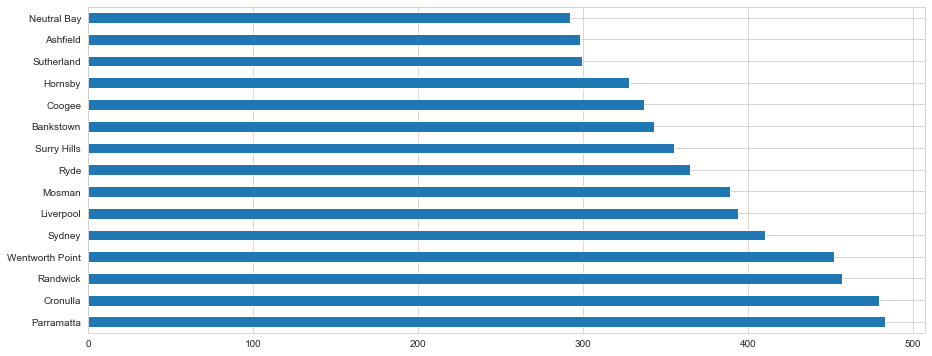

In [14]:
plt.figure(figsize = (15,6))
df["suburb"].value_counts()[:15].plot.barh()

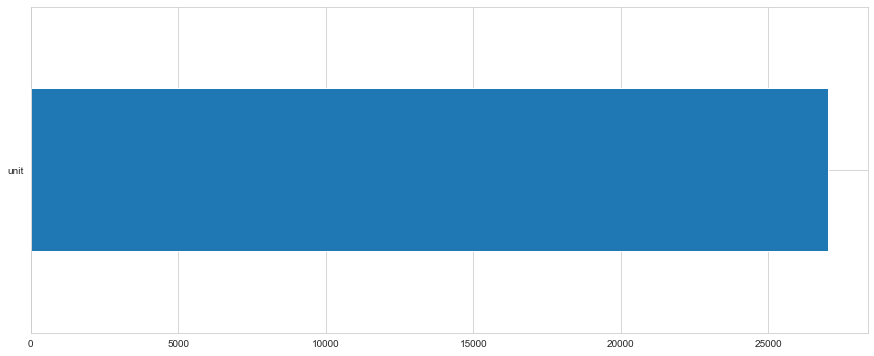

In [15]:
plt.figure(figsize = (15, 6))
df["property_type"].value_counts().plot.barh()

In [16]:
data_num = df.select_dtypes(["float64", "int64"]).columns

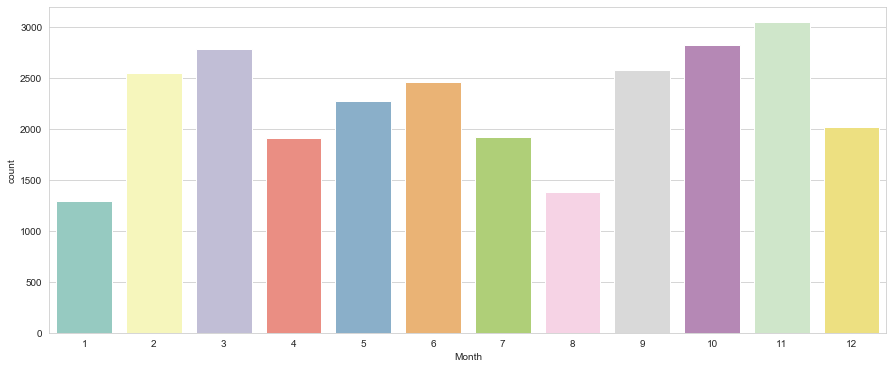

In [17]:
plt.figure(figsize = (15, 6))
sns.countplot(df["Month"], palette = "Set3")

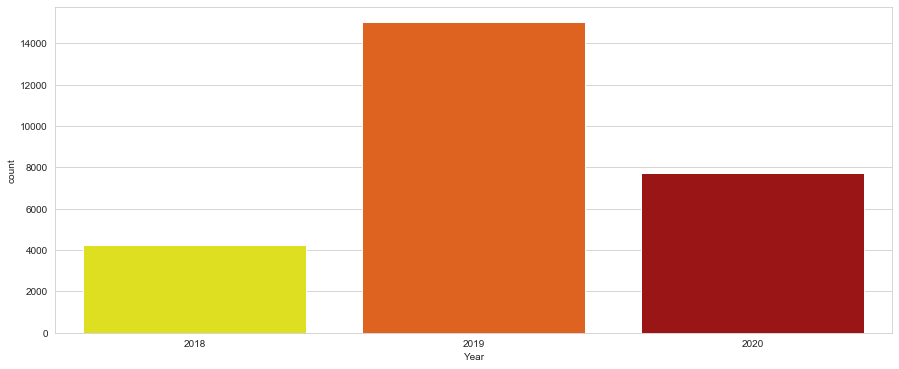

In [18]:
plt.figure(figsize = (15, 6))
sns.countplot(df["Year"], palette = "hot_r")

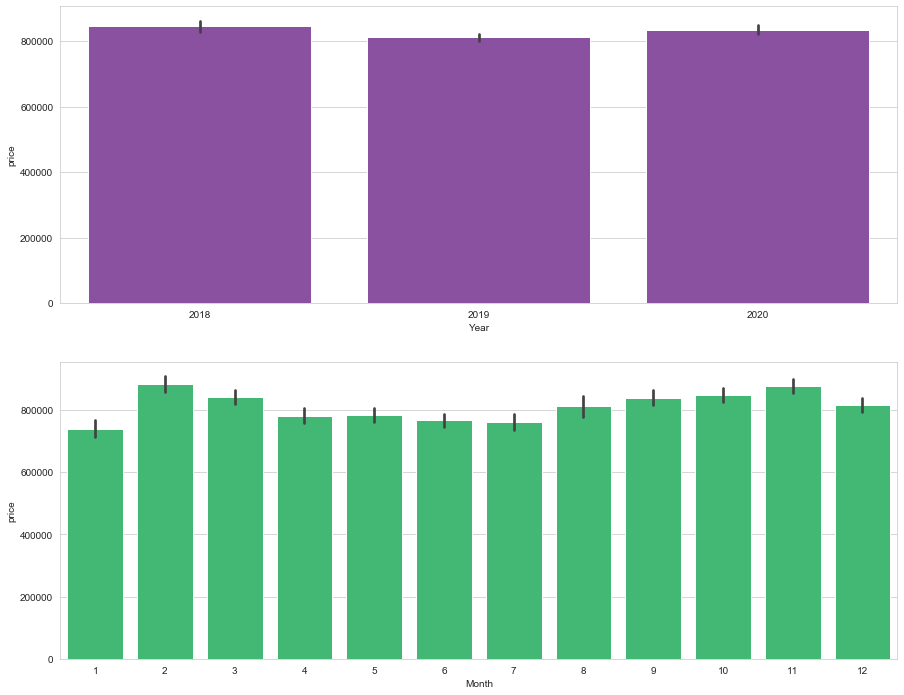

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 12))
sns.barplot(data = df, x = "Year", y = "price", color = "#8E44AD", ax = ax[0])
sns.barplot(data = df, x = "Month", y = "price", color = "#2ECC71", ax = ax[1])

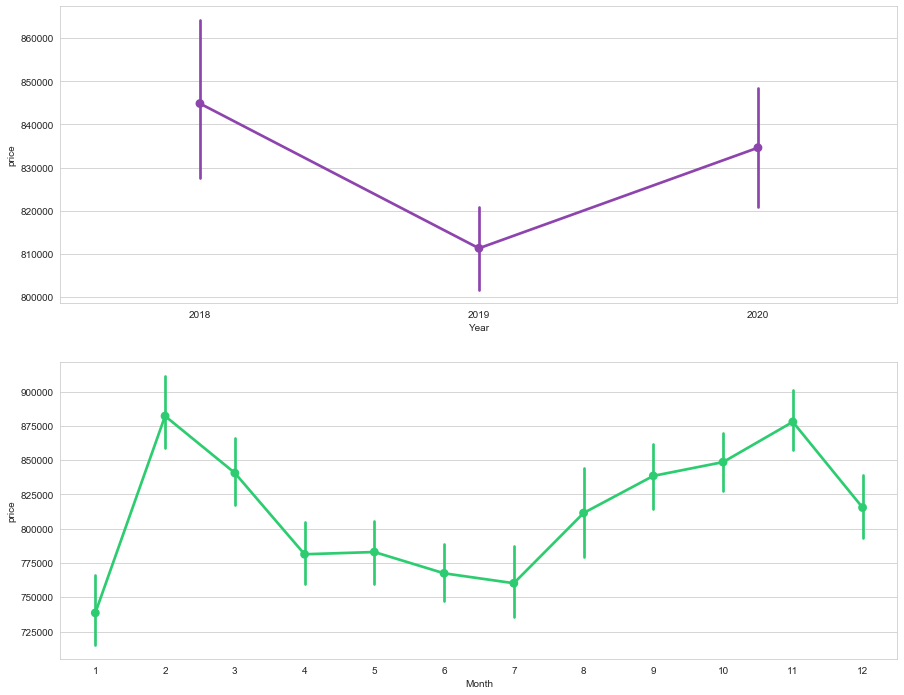

In [20]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.pointplot(data=df,x="Year",y="price",color="#8E44AD",ax=ax[0])
sns.pointplot(data=df,x="Month",y="price",color="#2ECC71",ax=ax[1])

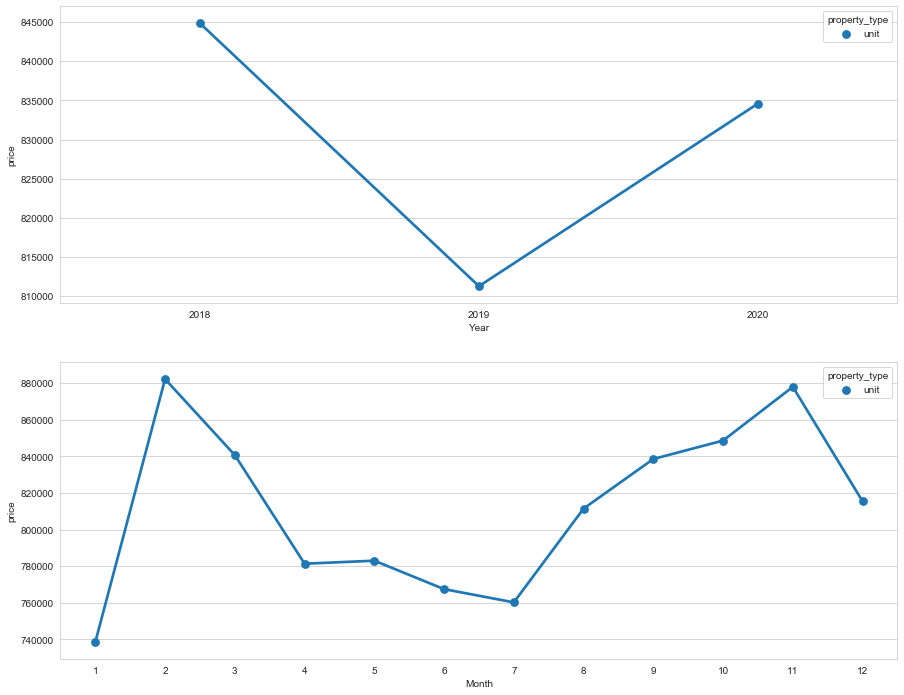

In [21]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.pointplot(data=df,x="Year",y="price",hue="property_type",ax=ax[0],ci=None)
sns.pointplot(data=df,x="Month",y="price",hue="property_type",ax=ax[1],ci=None)

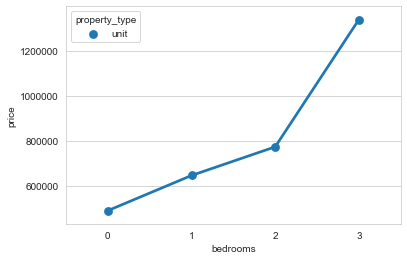

In [22]:
sns.pointplot(data = df, x = "bedrooms", y = "price", hue = "property_type", ci = None)

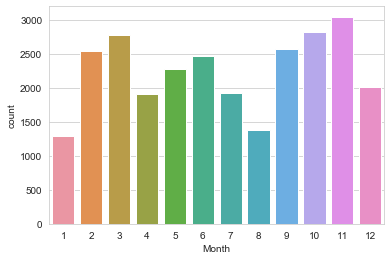

In [23]:
sns.countplot(df["Month"])

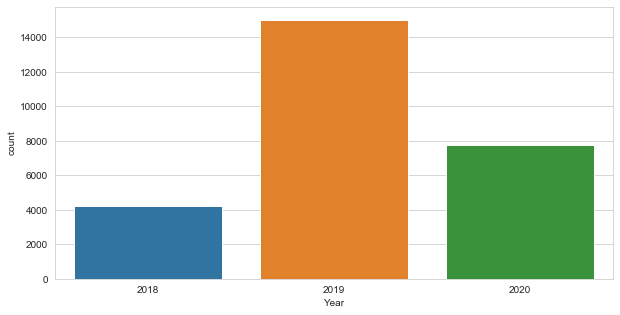

In [24]:
plt.figure(figsize = (10, 5))
sns.countplot(df["Year"])

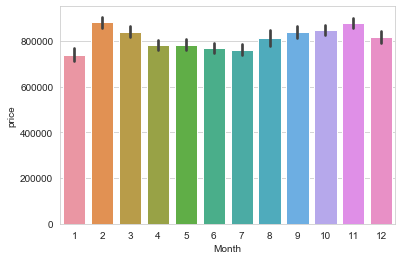

In [25]:
sns.barplot(x = df["Month"], y = df["price"], data = df)

Linear Regression Models (simple and multi-linear regression)

In [26]:
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [27]:
response = ['price']
numerical_predictors  = ['lat', 'lon']

mu = df[numerical_predictors].mean()
sigma = df[numerical_predictors].std()

df[numerical_predictors] = (df[numerical_predictors]-mu)/sigma
df.head()

,suburb,city_name,state,lat,lon,bedrooms,property_type,lga_pid,Year,Month,Day,price
0,Como,Sydney,NSW,-1.701663,-0.605292,3,unit,NSW298,2019,11,29,945000.0
1,Concord,Sydney,NSW,0.091060,-0.288014,3,unit,NSW282,2018,9,4,1150000.0
2,Concord,Sydney,NSW,0.199942,-0.250153,2,unit,NSW282,2018,9,22,790000.0
3,Concord,Sydney,NSW,0.181086,-0.161090,1,unit,NSW282,2019,3,7,490000.0
4,Concord,Sydney,NSW,0.141378,-0.180225,2,unit,NSW282,2019,2,5,570000.0


In [28]:
formula = "price ~ bedrooms"
model_formula = smf.ols(formula = formula, data = df)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3017.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:25:04   Log-Likelihood:            -2.9351e+05
No. Observations:               20231   AIC:                         5.870e+05
Df Residuals:                   20229   BIC:                         5.870e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.246e+05   1.14e+04     19.655      0.0

In [29]:
formula = "price ~ lat"
model_formula = smf.ols(formula = formula, data = df)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.479
Date:                Tue, 17 May 2022   Prob (F-statistic):            0.00625
Time:                        22:25:04   Log-Likelihood:            -2.9482e+05
No. Observations:               20225   AIC:                         5.897e+05
Df Residuals:                   20223   BIC:                         5.897e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.24e+05   3645.303    226.043      0.0

In [30]:
formula = "price ~ lon"
model_formula = smf.ols(formula = formula, data = df)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     5112.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:25:04   Log-Likelihood:            -2.9255e+05
No. Observations:               20225   AIC:                         5.851e+05
Df Residuals:                   20223   BIC:                         5.851e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.369e+05   3262.052    256.566      0.0

In [31]:
formula = "price ~ bedrooms + lat + lon"
model_formula = smf.ols(formula = formula, data = df)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     4159.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:25:04   Log-Likelihood:            -2.8997e+05
No. Observations:               20225   AIC:                         5.799e+05
Df Residuals:                   20221   BIC:                         5.800e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.498e+05   9670.192     15.494      0.0

This model, comprising of price as it's dependent variable, bedrooms, lat and lon as the independent variables, has an R-squared value of 0.382. This means that only 38% of the model is explained by the independent variables. Overall this model is not quite accurate and analysing any ceteris paribus effects between variables would not yield many useful insights. So linear regression was although tested, but eventually not included in the dashboard. 

As requested, here are the monthly sales for each individual year. Needed to use the query() function to filter out the correct years. 

### Monthly sales for 2018

In [32]:
df_new = df.query("Year == 2018")

Text(0.5, 1.0, 'Monthly property sales of 2018')

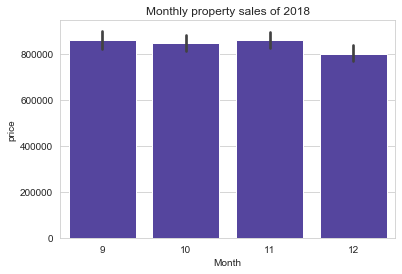

In [33]:
sns.barplot(x = df_new["Month"], y = df_new["price"], data = df_new, color = '#4c36ad')
plt.title("Monthly property sales of 2018")

### Monthly sales for 2019

In [34]:
df_new = df.query("Year == 2019")

Text(0.5, 1.0, 'Monthly property sales of 2019')

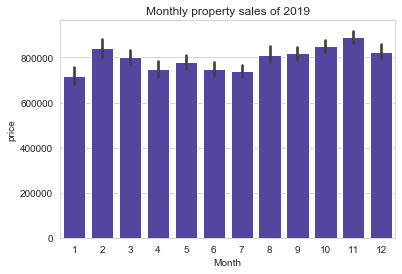

In [35]:
sns.barplot(x = df_new["Month"], y = df_new["price"], data = df_new, color = '#4c36ad')
plt.title("Monthly property sales of 2019")

### Monthly sales for 2020

In [36]:
df_new = df.query("Year == 2020")

Text(0.5, 1.0, 'Monthly property sales of 2020')

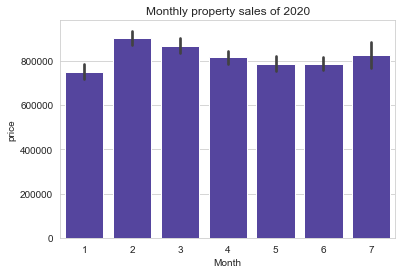

In [37]:
sns.barplot(x = df_new["Month"], y = df_new["price"], data = df_new, color = '#4c36ad')
plt.title("Monthly property sales of 2020")